## Importing The Libraries

In [564]:
import pandas as pd
import numpy as np

In [565]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [566]:
import warnings
warnings.filterwarnings("ignore")

In [567]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

In [568]:
from statsmodels.api import add_constant
from statsmodels.api import OLS

from statsmodels.stats.outliers_influence import variance_inflation_factor

## Reading The Dataset

In [569]:
rentals = pd.read_csv("day.csv")

In [570]:
rentals.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [571]:
rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [572]:
rentals.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Making the data more meaningful

In [573]:
rentals["season"] = rentals["season"].map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})

In [574]:
rentals["yr"] = rentals["yr"].map({0: 2018, 1:2019})

In [575]:
rentals["mnth"] = rentals["mnth"].map({1:"January", 2:"February", 3:"March", 4:"April", 5:"May", 6:"June", 
                                       7:"July", 8:"August", 9:"September", 10:"October", 11:"November", 12:"December"})

In [576]:
rentals["weekday"] = rentals["weekday"].map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday",
                                            5:"Friday", 6:"Sunday"})

In [577]:
rentals["weathersit"] = rentals["weathersit"].map({1:"Clear", 2:"Mist & Cloudy", 3:"Light Snow & Rain", 
                                                   4:"Heavy Snow & Rain"})

## Exploratory Data Analysis

### Categorical Columns

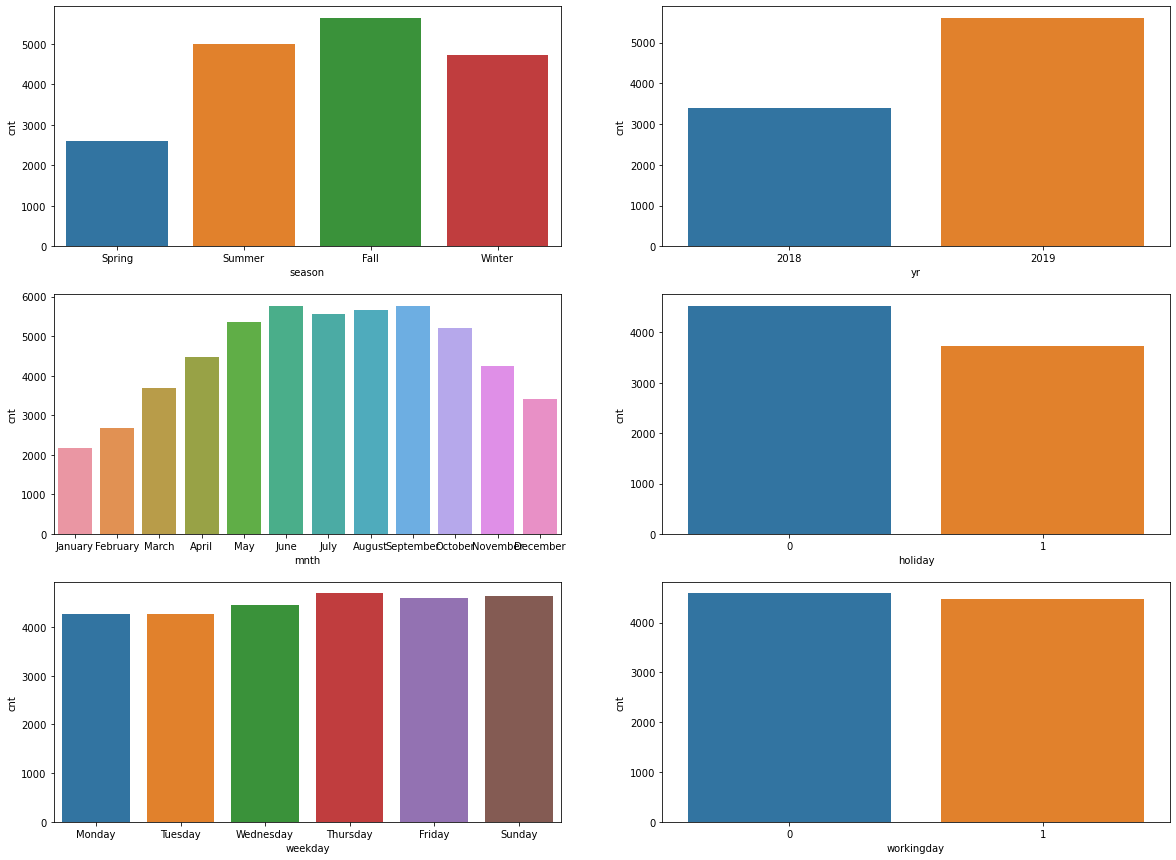

In [578]:
cat_cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday"]

fig, ax = plt.subplots(3,2, figsize=(20,15))

for i,d in enumerate(cat_cols):
    x, y = divmod(i,2)
    sns.barplot(x=d, y="cnt", data=rentals, ci=None, ax=ax[x,y])
    
plt.show()    

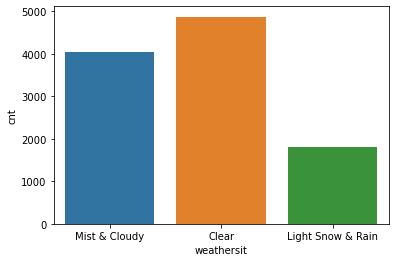

In [579]:
sns.barplot(x="weathersit", y="cnt", data=rentals, ci=None)
plt.show()

### Numerical Columns

In [580]:
num_cols = ["temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]

#### Correlation among the Numerical Columns

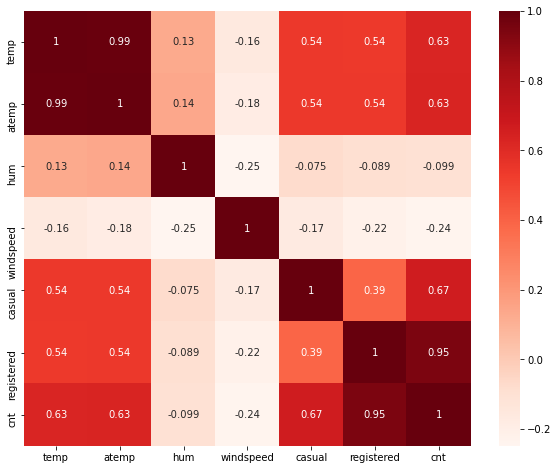

In [581]:
plt.figure(figsize=(10,8))
sns.heatmap(rentals[num_cols].corr(), cmap="Reds", annot=True)
plt.show()

We can see that temp and atemp variables are very much correlated (99%). So we drop one of those i.e. atemp and keep the temp variable. We also drop the casual and registered variables because the target variable is the sum of them. 

#### Distribution of the Numerical Columns 

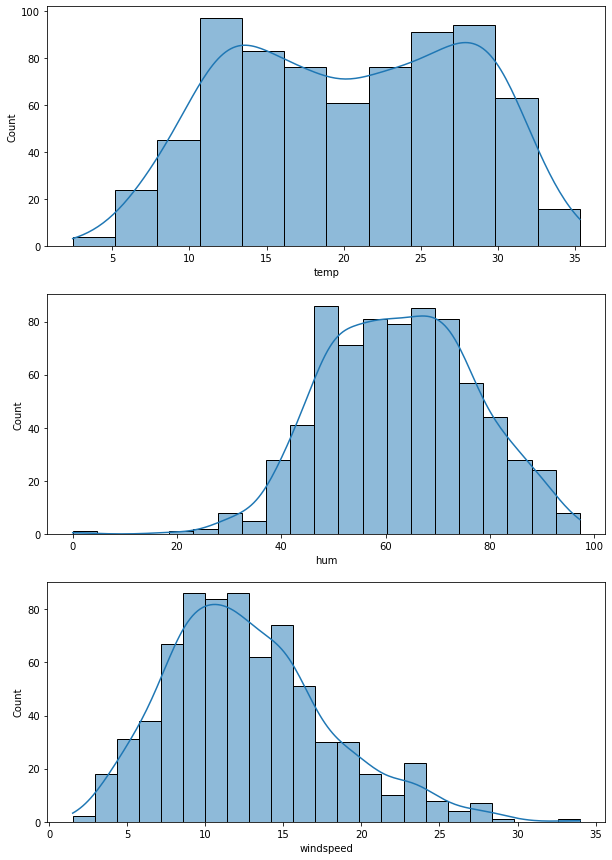

In [582]:
num_cols = ["temp", "hum", "windspeed"]

fig, ax = plt.subplots(3,1, figsize=(10,15))

for i,d in enumerate(num_cols):
    sns.histplot(x=d, data=rentals, kde=True, ax=ax[i])
    
plt.show()    

#### Relationship with the Target Variable

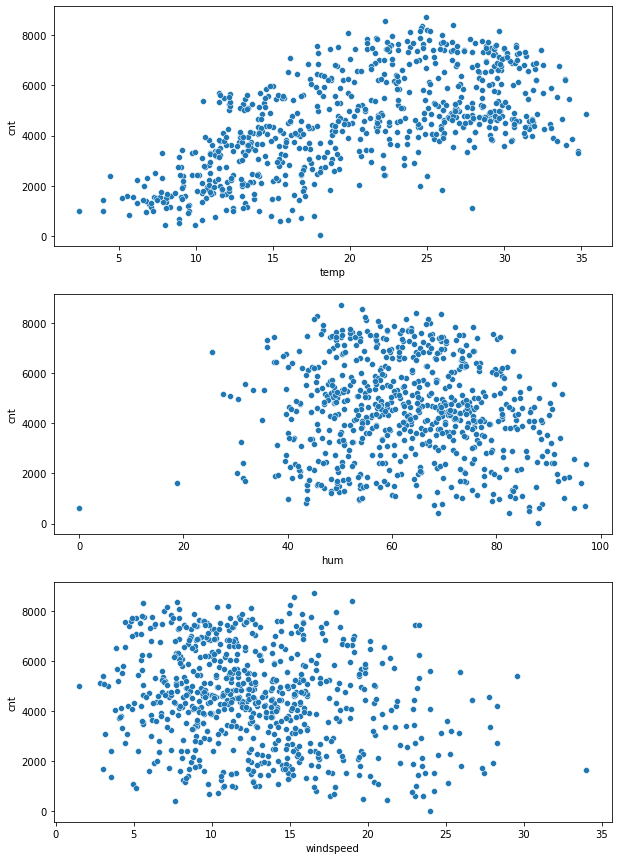

In [583]:
num_cols = ["temp", "hum", "windspeed"]

fig, ax = plt.subplots(3,1, figsize=(10,15))

for i,d in enumerate(num_cols):
    sns.scatterplot(x=d, y="cnt", data=rentals, ax=ax[i])
    
plt.show()    

## Getting Dummy Columns For Categorical Columns

In [584]:
# Changing the data types of categorical columns to 'object'
for col in cat_cols:
    rentals[col] = rentals[col].astype("object")

In [585]:
# Generating the dummy columns

# We omitted 'yr', 'holiday' and 'workday' because they were already binary variables
cat_cols = ["season", "mnth", "weekday", "weathersit"]

dummies = pd.get_dummies(rentals[cat_cols], prefix="", prefix_sep="", drop_first=True) 

In [586]:
dummies

,Spring,Summer,Winter,August,December,February,January,July,June,March,...,November,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,Light Snow & Rain,Mist & Cloudy
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
726,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
727,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [587]:
# Concatenating the dummy columns with the rentals dataset
rentals = pd.concat([rentals, dummies], axis=1)

In [588]:
# Dropping the categorical columns
rentals.drop(cat_cols, axis=1, inplace=True)

In [589]:
# Dropping 'instant', 'dteday', 'casual' and 'registered' columns
rentals.drop(["instant", "dteday", "casual", "registered"], axis=1, inplace=True)

In [590]:
# Getting a look at the final dataset 
rentals.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,November,October,September,Monday,Sunday,Thursday,Tuesday,Wednesday,Light Snow & Rain,Mist & Cloudy
0,2018,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,2018,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


## Model Building 

In [591]:
y = rentals["cnt"].values
X = rentals.drop(["cnt"], axis=1)
cols = list(X.columns)

### Creating the Train-Test Split

In [592]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

### Scaling the Features with Min-Max Scaler

In [593]:
scaler = MinMaxScaler()

# Fitting the Scaler on the X_train and transforming the X_train
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=cols)

# Transforming the X_train using the fitted scaler
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns=cols)

### Fitting A Linear Regression Model

In [594]:
# Method to calculate the Variance Inflation Factor

def calculate_vif(X_train):
    vif = pd.DataFrame()
    vif["variables"] = X_train.columns
    vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    return vif

In [595]:
# Method to fit a Linear Regression Model

def fit_model(X_train, y_train):
    lr = OLS(y_train, X_train).fit()
    print(lr.summary())
    return lr

In [596]:
# Method for the analysis of residuals

def get_residual_analysis(lr, X_train, y_train):
    res = y_train - lr.predict(X_train) 

    plt.figure(figsize=(12,6))
    plt.title("Distribution Of Residuals")
    sns.histplot(res, kde=True)
    plt.show()
    
    plt.figure(figsize=(12,6))
    plt.title("Residuals vs Predicted Values")
    sns.scatterplot(x=lr.predict(X_train), y=res)
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.show()

    r2 = r2_score(y_train, lr.predict(X_train))
    print("R2 score of the fitted model {}".format(np.round(r2,2)))

In [597]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=12)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=12)

In [598]:
features = X_train.columns[rfe.support_].tolist()
X_train = X_train[features]
X_train = add_constant(X_train)

#### 1st Model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     242.4
Date:                Sun, 09 May 2021   Prob (F-statistic):          4.14e-207
Time:                        15:01:08   Log-Likelihood:                -4411.4
No. Observations:                 547   AIC:                             8849.
Df Residuals:                     534   BIC:                             8905.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2461.3943    290.19

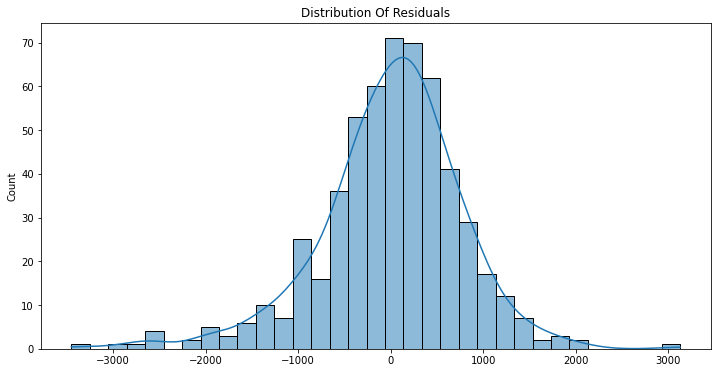

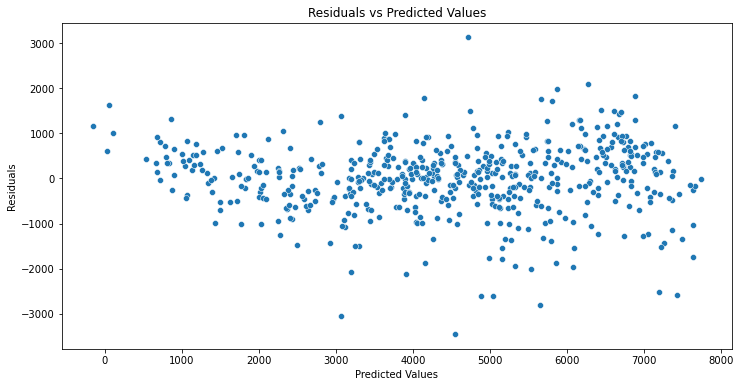

R2 score of the fitted model 0.84


,variables,VIF
0,yr,2.073861
1,holiday,1.046428
2,temp,15.727291
3,hum,27.782584
4,windspeed,4.558082
5,Spring,4.144054
6,Summer,2.752293
7,Winter,3.249126
8,July,1.559891
9,September,1.393831


In [599]:
lr = fit_model(X_train, y_train)
get_residual_analysis(lr, X_train, y_train)
calculate_vif(X_train.drop("const", axis=1))

#### 2nd Model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     252.3
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.40e-203
Time:                        15:01:09   Log-Likelihood:                -4422.6
No. Observations:                 547   AIC:                             8869.
Df Residuals:                     535   BIC:                             8921.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1693.5411    245.27

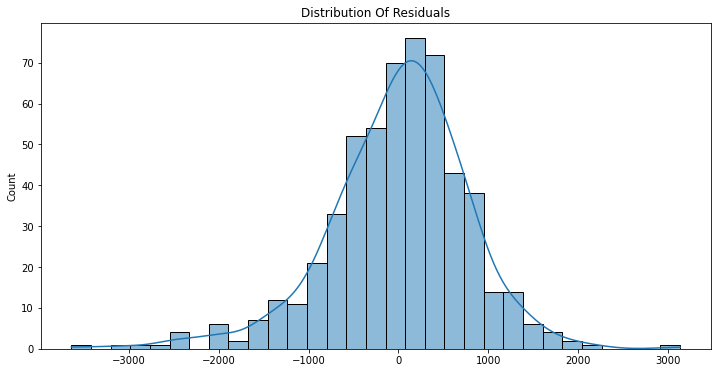

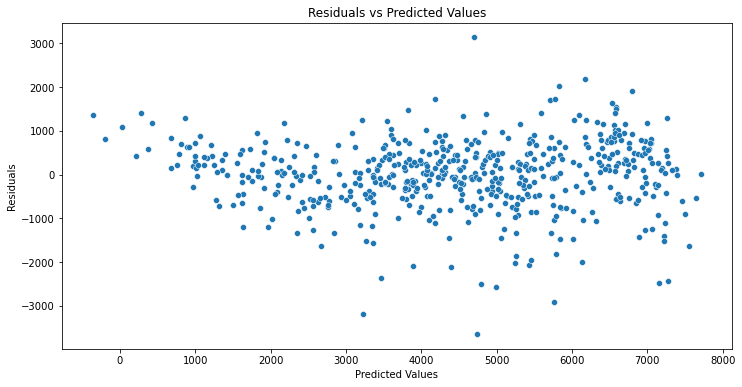

R2 score of the fitted model 0.84


,variables,VIF
0,yr,2.062815
1,holiday,1.046284
2,temp,5.103633
3,windspeed,4.523111
4,Spring,2.118429
5,Summer,2.236805
6,Winter,1.781922
7,July,1.559809
8,September,1.346829
9,Light Snow & Rain,1.077098


In [600]:
# We remove the 'hum' column as it has the highest VIF
X_train.drop(["hum"], axis=1, inplace=True)

lr = fit_model(X_train, y_train)
get_residual_analysis(lr, X_train, y_train)
calculate_vif(X_train.drop("const", axis=1))

#### 3rd Model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     173.0
Date:                Sun, 09 May 2021   Prob (F-statistic):          1.23e-160
Time:                        15:01:11   Log-Likelihood:                -4526.8
No. Observations:                 547   AIC:                             9076.
Df Residuals:                     536   BIC:                             9123.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5082.8075    142.23

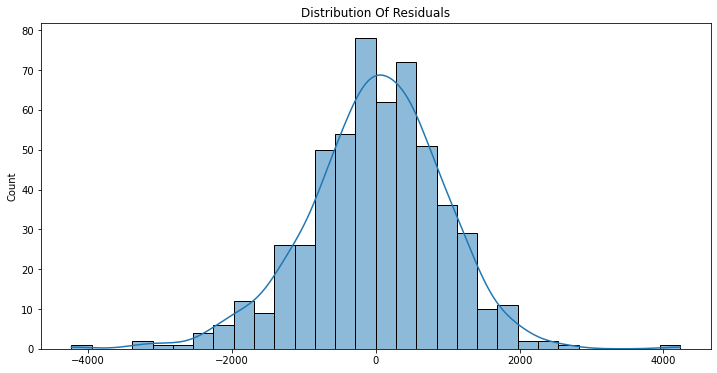

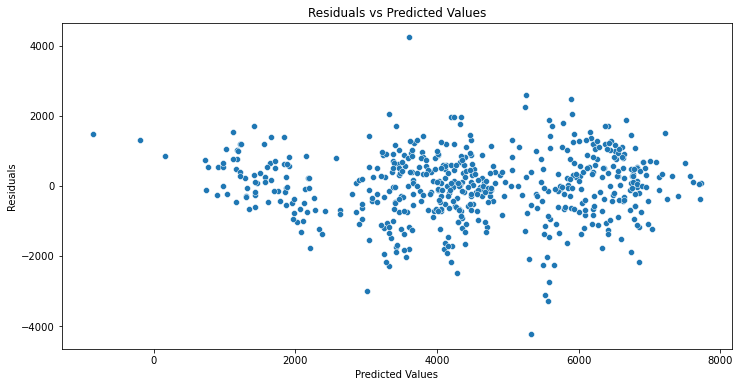

R2 score of the fitted model 0.76


,variables,VIF
0,yr,1.854445
1,holiday,1.046283
2,windspeed,3.750493
3,Spring,2.111620
4,Summer,1.979443
5,Winter,1.717170
6,July,1.181810
7,September,1.161352
8,Light Snow & Rain,1.077059
9,Mist & Cloudy,1.536527


In [601]:
# We remove the 'temp' column as it has the highest VIF
X_train.drop(["temp"], axis=1, inplace=True)

lr = fit_model(X_train, y_train)
get_residual_analysis(lr, X_train, y_train)
calculate_vif(X_train.drop("const", axis=1))

Finally we have a model with 10 features with none of them having a VIF >=5

#### The Assumptions of Linear Regression are satisfied:-

1. The residual terms are normally distributed and centered around 0.
2. There is a linear relationship between the predictor variables and the target variable as the R2 score is 0.76.
3. Perfect multicollinearity is not there as no predictor variable has a VIF >= 5.
4. The residual terms are spread out on either side of 0 when plotted against the predicted values.

#### The three most important variables are - 

In [602]:
imp = pd.DataFrame()
imp["feature"] = X_train.columns
imp["coefficient"] = np.abs(lr.params.tolist())

imp.sort_values(by="coefficient", ascending=False)

,feature,coefficient
0,const,5082.807540
4,Spring,2650.825729
9,Light Snow & Rain,2610.117852
1,yr,2140.513339
3,windspeed,1453.630139
2,holiday,1046.881745
10,Mist & Cloudy,754.279790
8,September,634.259181
6,Winter,611.824442
5,Summer,352.587182


1. Spring
2. Light Snow & Rain
3. yr

### Making Predictions

In [603]:
X_test = add_constant(X_test)
X_test = X_test[X_train.columns]

# Making predictions on the test set
y_pred = lr.predict(X_test)

In [604]:
r2 = r2_score(y_test, y_pred)
print("R2 score on the test set {}".format(np.round(r2,2)))

R2 score on the test set 0.71


## Conclusion

We got a fairly decent model. We got a R2 score of 0.76 on the training dataset and 0.71 on the test dataset. 